# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.3.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [ ]:
a = tf.constant(2)
print(tf.rank(a))
print(a)
#a는 0차원이고 2이다.

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
b = tf.constant([2,3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [ ]:
c = tf.constant([[2,3], [6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [ ]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)
#데이터 타입이 string

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [ ]:
rand = tf.random.uniform([1], 0, 1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.8616489], shape=(1,), dtype=float32)


In [ ]:
rand2 = tf.random.normal([1, 2], 0, 1) #0-1사이에 shape 1,2를 갖는 랜덤갑ㄳ
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-0.80917937  2.798788  ]], shape=(1, 2), dtype=float32)


In [ ]:
rand3 = tf.random.normal(shape=(3, 2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[-0.3406086 -1.0376343]
 [ 1.5060354  0.9062038]
 [ 1.5958766  0.2394607]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [ ]:
a = tf.constant(3)
b = tf.constant(2)

In [ ]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
print(tf.subtract(a, b))
print( a - b )

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
print(tf.multiply(a, b))
print( a* b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [ ]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


In [ ]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [ ]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [ ]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [ ]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t)
#square 제곱

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [ ]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
#tf.constant(2.) + tf.constant(40)

In [ ]:
#tf.constant(2.) + tf.constant(30., dtype=tf.float64)

In [ ]:
#데이터 타입을 똑같이 ㅁ자춰져야 연산 가능
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [ ]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [ ]:
@tf.function
def my_function(x):
  return x**2 - 10*x + 3


print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
def my_function_(x):
  return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_func.python_function(2)

-13

In [ ]:
def function_to_get_faster(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [ ]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)
  return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [ ]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [ ]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
    self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 5.134032984999976
Graph time: 3.076246710000305


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [ ]:
X = tf.Variable(20.0)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [ ]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()
#미분한 값-> 3*2=6 -> 6이 맞음

6.0

In [ ]:
#x2 = tf.Variable(4)
#dy_dx = tape.gradient(y, x2) 
#dy_dx.numpy()
#한번만 호출할 수 있도록 되어 있기때문에, 더이상은 호출이 안된다.

In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y_sq = y**2
  z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx', grad['x'])

print('dz/dy', grad['y'])

dz/dx tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy None


In [ ]:
#지속가능방법
weights = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ weights + biases
  loss = tf.reduce_mean(y**2)

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [ ]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
weights2 = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [ ]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
  z = x * W + biases
  return sigmoid(z)

In [ ]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W)) #뉴런에 전달해줌

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[-0.20202066  0.9797649 ]], shape=(1, 2), dtype=float32)
tf.Tensor([[-1.2285548  1.2916869]], shape=(1, 2), dtype=float32)
[[0.56173176 0.77997994]]


In [ ]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W)) #뉴런에 전달해줌

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[ 1.3191047 ]
 [-0.84618616]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[1.8530279]
 [2.118334 ]], shape=(2, 1), dtype=float32)
[[0.92014647 0.92014647]
 [0.1427659  0.1427659 ]]


In [ ]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W)) #뉴런에 전달해줌
#shape가 다를때

x.shape: (1,)
W.shape: (1, 2)
tf.Tensor([-0.3775261], shape=(1,), dtype=float32)
tf.Tensor([[ 1.0800817  -0.46243513]], shape=(1, 2), dtype=float32)
[[0.39944962 0.5435348 ]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [ ]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y:', y)

[0.47096044 0.47096044]
y: 0


In [ ]:
for i in range(1000):
  output = Neuron(x, W)
  error = y - output
  W = W + x * 0.1 *error

  if i % 100 == 99:
    print("{}\t{}\t".format(i+1, error, output))

100	[-0.09981749 -0.09981749]	
200	[-0.05170268 -0.05170268]	
300	[-0.03455354 -0.03455354]	
400	[-0.02586876 -0.02586876]	
500	[-0.02064533 -0.02064533]	
600	[-0.01716497 -0.01716497]	
700	[-0.0146827 -0.0146827]	
800	[-0.01282428 -0.01282428]	
900	[-0.01138147 -0.01138147]	
1000	[-0.01022918 -0.01022918]	


In [ ]:
def Neuron2(x, W, bias=0):
  z = tf.matmul(x, W, transpose_b=True) + bias
  return sigmoid(z)

In [ ]:
x = tf.random.normal((1, 3), 0, 1)  #행렬곱
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print("y:", y)

[[0.6575328]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [ ]:
for i in range(1000):
  output = Neuron2(x, W)
  error = y - output
  W = W + x * 0.1 * error

if i % 100 == 99:
  print("{}\t{}\t{}".format(i+1, error, output))

1000	[[0.00062084]]	[[0.99937916]]


In [ ]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1, ))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-1.8630897 -1.5143349 -1.076077 ]]
weights	: [[ 1.9165754   0.29255497 -1.1193571 ]]
bias	: [[0.]]


In [ ]:
for i in range(1000):
  output = Neuron2(x, weights, bias=bias)
  error = y - output
  weights = weights + x * 0.1 * error
  bias = bias + 1 * 0.1 * error

  if i % 100 ==99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.01349503]]	[[0.986505]]
200	[[0.00654107]]	[[0.9934589]]
300	[[0.00431317]]	[[0.9956868]]
400	[[0.00321651]]	[[0.9967835]]
500	[[0.00256425]]	[[0.99743575]]
600	[[0.00213182]]	[[0.9978682]]
700	[[0.00182414]]	[[0.99817586]]
800	[[0.00159401]]	[[0.998406]]
900	[[0.00141537]]	[[0.9985846]]
1000	[[0.00127286]]	[[0.99872714]]


In [ ]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-1.8630897 -1.5143349 -1.076077 ]]
weights	: [[-0.31180078 -1.5186886  -2.4064167 ]]
bias	: [[1.1960647]]


### AND Gate

In [ ]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0],[0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] = output
    W = W + X[j] * 0.1 * error
    b = b+ b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

Epoch    0	Error Sum [2.3963737]
Epoch  200	Error Sum [4.]
Epoch  400	Error Sum [4.]
Epoch  600	Error Sum [4.]
Epoch  800	Error Sum [4.]
Epoch 1000	Error Sum [4.]
Epoch 1200	Error Sum [4.]
Epoch 1400	Error Sum [4.]
Epoch 1600	Error Sum [4.]
Epoch 1800	Error Sum [4.]

가중치	: [398.8369 398.8187]
편향	: [799.5917]


In [ ]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i]*W)+b)))

X: [1 1] Y: [1] Output: [1.]
X: [1 0] Y: [1] Output: [1.]
X: [0 1] Y: [1] Output: [1.]
X: [0 0] Y: [1] Output: [1.]


### OR Gate

In [ ]:
X2 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y2 = np.array([[1], [1], [1], [0]])

W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
    error = Y2[j][0] = output
    W2 = W2 + X2[j] * 0.1 * error
    b2 = b2+ b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

Epoch    0	Error Sum [3.4107184]
Epoch  200	Error Sum [4.]
Epoch  400	Error Sum [4.]
Epoch  600	Error Sum [4.]
Epoch  800	Error Sum [4.]
Epoch 1000	Error Sum [4.]
Epoch 1200	Error Sum [4.]
Epoch 1400	Error Sum [4.]
Epoch 1600	Error Sum [4.]
Epoch 1800	Error Sum [4.]

가중치	: [398.8369 398.8187]
편향	: [799.5917]


In [ ]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i]*W2)+b2)))

X: [1 1] Y: [1] Output: [1.]
X: [1 0] Y: [1] Output: [1.]
X: [0 1] Y: [1] Output: [1.]
X: [0 0] Y: [1] Output: [1.]


### XOR Gate

In [ ]:
X3 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])

W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
    error = Y3[j][0] = output
    W3 = W3 + X3[j] * 0.1 * error
    b3 = b3+ b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W3))
print("편향\t: {}".format(b3))

Epoch    0	Error Sum [2.4170194]
Epoch  200	Error Sum [4.]
Epoch  400	Error Sum [4.]
Epoch  600	Error Sum [4.]
Epoch  800	Error Sum [4.]
Epoch 1000	Error Sum [4.]
Epoch 1200	Error Sum [4.]
Epoch 1400	Error Sum [4.]
Epoch 1600	Error Sum [4.]
Epoch 1800	Error Sum [4.]

가중치	: [399.2535  399.79068]
편향	: [798.9603]


In [ ]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i]*W3)+b3)))

X: [1 1] Y: [1] Output: [1.]
X: [1 0] Y: [1] Output: [1.]
X: [0 1] Y: [1] Output: [1.]
X: [0 0] Y: [1] Output: [1.]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X4, Y4, epochs = 2000, batch_size=1, verbose=0)

In [ ]:
model.predict(X4)

array([[0.04725926],
       [0.95150757],
       [0.9376779 ],
       [0.05378735]], dtype=float32)

## 시각화 사용

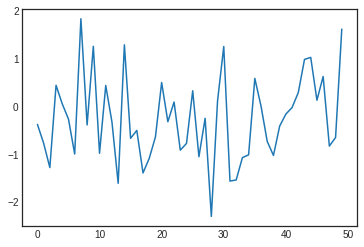

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

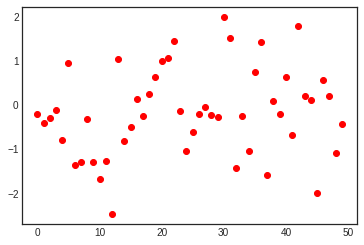

In [ ]:
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'ro')
plt.show()

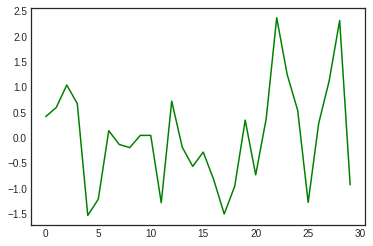

In [ ]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'g-')
plt.show()

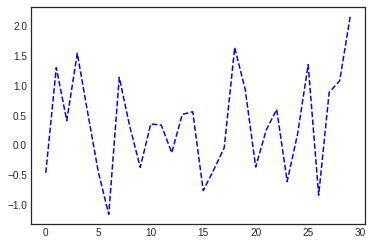

In [ ]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'b--')
plt.show()

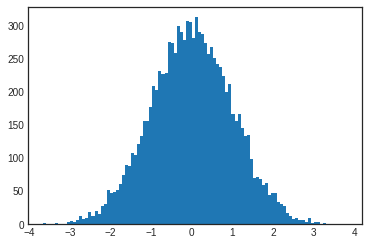

In [ ]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

### XOR Gate의 'LOSS' 시각화


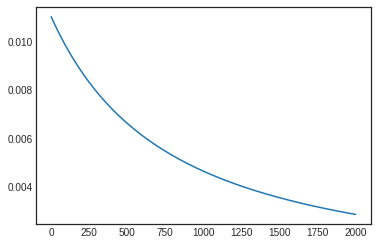

In [ ]:
plt.plot(history.history['loss']);